In [1]:
import sys
import os
import pandas as pd
import numpy as np
sys.path.append(os.path.abspath('C:/Users/ingse/OneDrive/Desktop/repositorio/pj_sa_202402/src'))
import matplotlib.pyplot as plt
from scipy.stats import *
from funciones import *

import seaborn as sns


In [2]:
np.random.seed(0)
edades=datos_sesgados(3,100000,63)

In [3]:
tamano_muestra=100
muestra = np.random.choice(edades,tamano_muestra)

print(muestra)
muestras_generadas=np.array([])
num_muestra=100
for  i in range (num_muestra):
    muestras_generadas=np.append(muestras_generadas,np.random.choice(edades,tamano_muestra,replace=False))
muestras_generadas=muestras_generadas.reshape(-1,tamano_muestra)
print (muestras_generadas)
int_confi=np.quantile(muestras_generadas.mean(axis=1),[0.025,0.975])
print(int_confi)

[32.  34.8 34.9 31.6 34.6 36.3 33.5 40.7 29.6 36.8 37.  30.8 38.4 32.3
 40.6 30.4 28.7 31.6 39.9 41.7 27.1 31.6 28.3 34.2 28.8 35.7 41.  31.2
 34.6 29.7 43.3 33.8 36.7 30.2 31.6 37.9 35.7 36.9 37.1 40.5 30.5 39.7
 38.5 32.8 40.8 34.7 37.1 34.1 29.7 45.9 33.  42.6 37.1 38.8 31.2 33.4
 33.5 32.6 31.6 33.2 33.6 33.4 34.4 26.3 25.5 36.  48.2 43.2 33.8 29.2
 29.8 35.3 33.3 42.6 36.8 35.3 32.5 44.6 33.8 36.7 38.3 36.3 29.5 42.6
 44.6 31.1 33.8 34.7 38.2 37.8 30.8 31.1 31.3 31.3 31.9 30.2 26.2 35.9
 35.1 29.4]
[[38.4 29.2 36.3 ... 25.9 27.5 31.4]
 [27.2 38.2 42.  ... 37.9 46.3 47.1]
 [37.4 38.1 27.1 ... 35.1 33.  36.8]
 ...
 [35.1 30.3 41.6 ... 31.8 44.  20.2]
 [41.  30.8 28.6 ... 33.  27.9 34.9]
 [36.6 36.5 32.  ... 33.9 34.3 33.2]]
[32.79345 34.94675]


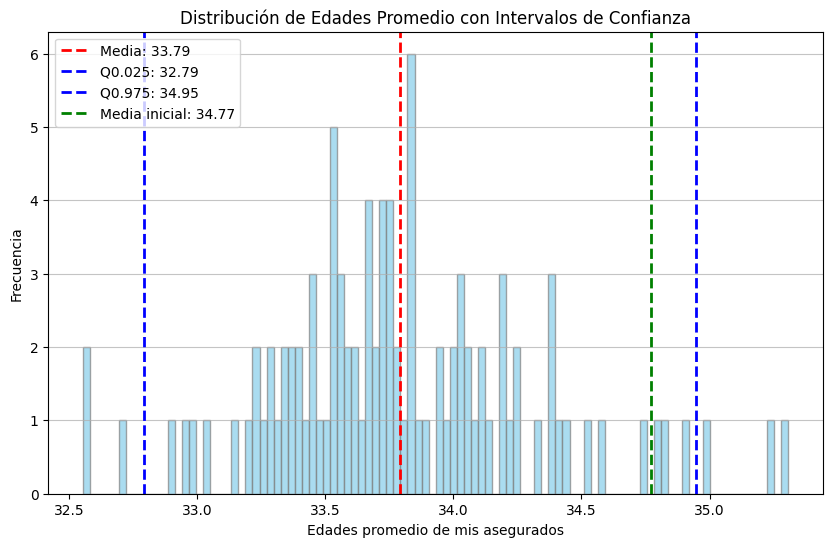

In [4]:
medias_muestras = muestras_generadas.mean(axis=1)
# Crear el histograma y agregar las líneas de los cuantiles y la media
plt.figure(figsize=(10, 6))
plt.hist(medias_muestras, bins=100, color="skyblue", edgecolor='gray', alpha=0.7)
plt.axvline(medias_muestras.mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {medias_muestras.mean():.2f}')
plt.axvline(int_confi[0], color='blue', linestyle='--', linewidth=2, label=f'Q0.025: {int_confi[0]:.2f}')
plt.axvline(int_confi[1], color='blue', linestyle='--', linewidth=2, label=f'Q0.975: {int_confi[1]:.2f}')
plt.axvline(muestra.mean(), color='green', linestyle='--', linewidth=2, label=f'Media inicial: {muestra.mean():.2f}')

# Añadir etiquetas y leyenda
plt.xlabel("Edades promedio de mis asegurados")
plt.ylabel("Frecuencia")
plt.title("Distribución de Edades Promedio con Intervalos de Confianza")
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

[*********************100%***********************]  1 of 1 completed


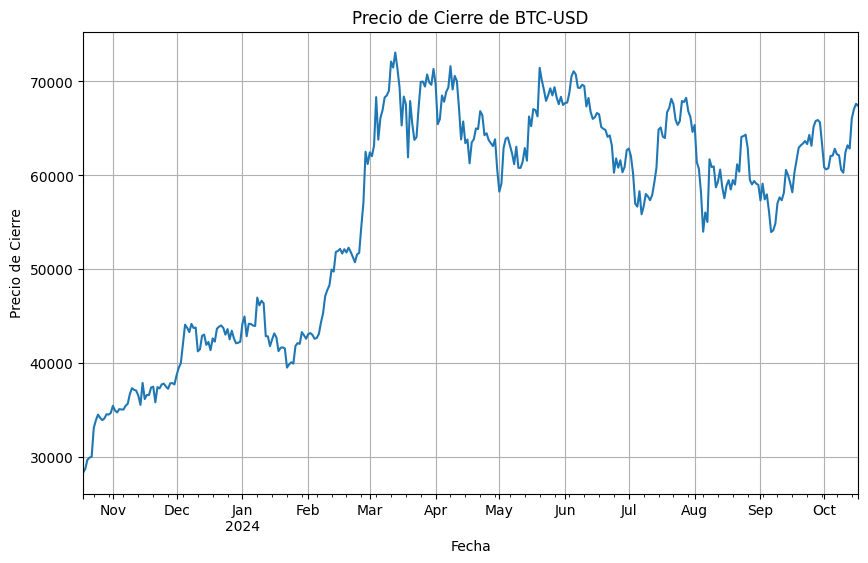

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
                              Adj Close         Close          High  \
Date                                                                  
2023-10-18 00:00:00+00:00  28328.341797  28328.341797  28889.009766   
2023-10-19 00:00:00+00:00  28719.806641  28719.806641  28892.474609   
2023-10-20 00:00:00+00:00  29682.949219  29682.949219  30104.085938   
2023-10-21 00:00:00+00:00  29918.412109  29918.412109  30287.482422   
2023-10-22 00:00:00+00:00  29993.896484  29993.896484  30199.433594   
...                                 ...           ...           ...   
2024-10-13 00:00:00+00:00  62851.375000  62851.375000  63272.652344   
2024-10-14 00:00:00+00:00  66046.125000  66046.125000  66482.492188   
2024-10-15 00:00:00+00:00  67041.109375  67041.109375  67881.679688   
2024-10-16 00:00:00+00:00  67612.718750  67612.718750  68375.289062   
2024-10-17 00:00:00+00:00  67399.835938  67399.835938  67912.210938  

In [5]:
# Parametros extraccion 
Montecarlo_results = pd.DataFrame()
ticker = 'BTC-USD'  
start_date = '2023-10-18'
end_date = '2024-10-18'
data=extrae(ticker, start_date, end_date)
print(data.columns)
print(data)


In [6]:
bitcoin = pd.DataFrame({
    'fecha': data.index,         
    'Close': data['Adj Close']  
})
bitcoin['retorno'] = np.log(data['Adj Close'] / data['Adj Close'].shift(-1))
bitcoin = bitcoin.sort_values(by='fecha', ascending=False)
bitcoin = bitcoin.reset_index(drop=True)
num_registros = 100 # se quema valor para visualizar 
bitcoin = bitcoin.head(num_registros) 
print(f"Se seleccionaron {num_registros} registros aleatorios para bitcoin.")
print(bitcoin)

Se seleccionaron 100 registros aleatorios para bitcoin.
                       fecha         Close   retorno
0  2024-10-17 00:00:00+00:00  67399.835938       NaN
1  2024-10-16 00:00:00+00:00  67612.718750  0.003154
2  2024-10-15 00:00:00+00:00  67041.109375 -0.008490
3  2024-10-14 00:00:00+00:00  66046.125000 -0.014953
4  2024-10-13 00:00:00+00:00  62851.375000 -0.049581
..                       ...           ...       ...
95 2024-07-14 00:00:00+00:00  60787.792969 -0.064999
96 2024-07-13 00:00:00+00:00  59231.953125 -0.025928
97 2024-07-12 00:00:00+00:00  57899.464844 -0.022753
98 2024-07-11 00:00:00+00:00  57344.914062 -0.009624
99 2024-07-10 00:00:00+00:00  57742.496094  0.006909

[100 rows x 3 columns]


[[ 0.02284251  0.01687024  0.01203949 ... -0.0107566   0.02024486
   0.00690925]
 [ 0.00336253  0.03576248 -0.01464538 ...         nan -0.01523424
   0.00453479]
 [-0.00107858 -0.03193999 -0.04119072 ... -0.11461586 -0.00147305
   0.00931261]
 ...
 [-0.03069673  0.01354163 -0.00962398 ... -0.00677495 -0.02092454
   0.00542109]
 [-0.03598749 -0.0116727  -0.000362   ... -0.00240523  0.00509037
   0.00225971]
 [-0.01495264  0.00811202  0.00930535 ... -0.03176403 -0.02291143
   0.0248315 ]]
                       fecha         Close   retorno
0  2024-10-17 00:00:00+00:00  67399.835938       NaN
1  2024-10-16 00:00:00+00:00  67612.718750  0.003154
2  2024-10-15 00:00:00+00:00  67041.109375 -0.008490
3  2024-10-14 00:00:00+00:00  66046.125000 -0.014953
4  2024-10-13 00:00:00+00:00  62851.375000 -0.049581
..                       ...           ...       ...
95 2024-07-14 00:00:00+00:00  60787.792969 -0.064999
96 2024-07-13 00:00:00+00:00  59231.953125 -0.025928
97 2024-07-12 00:00:00+00:00  5

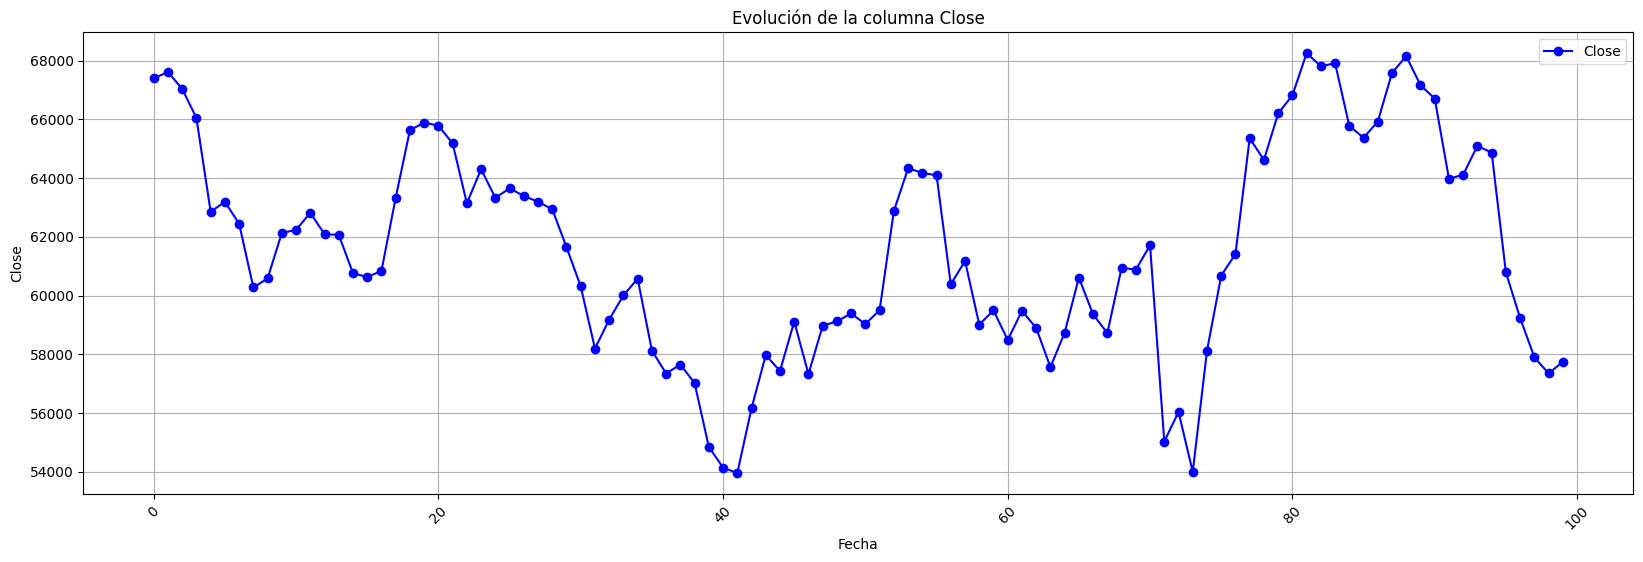

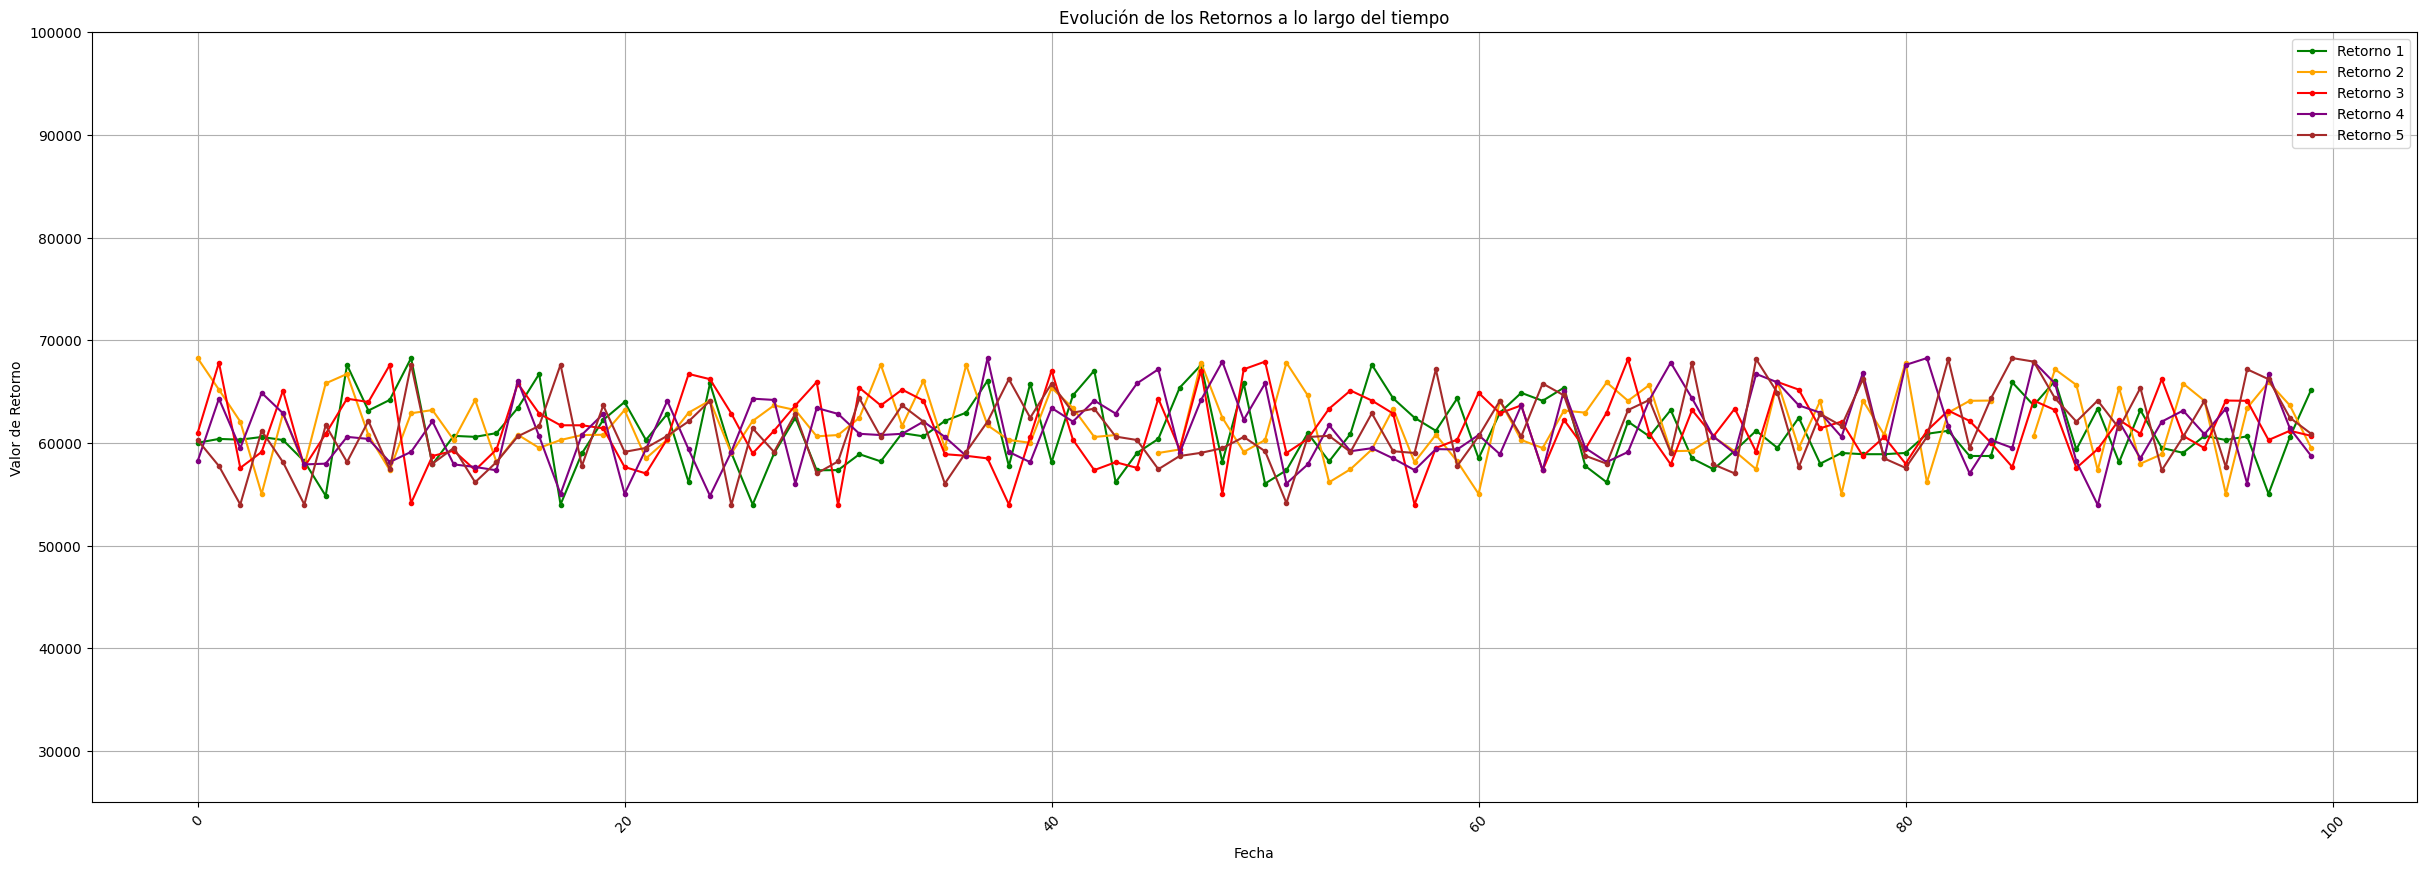

In [7]:

muestras_generadas=np.array([])
num_muestra=1000
for  i in range (num_muestra):
    muestras_generadas=np.append(muestras_generadas,np.random.choice(bitcoin['retorno'],num_registros,replace=True))
muestras_generadas=muestras_generadas.reshape(-1,num_registros)
print (muestras_generadas)
print(bitcoin)

bitcoin_2 = pd.DataFrame({    'retorno': bitcoin['retorno'] ,   'Close': bitcoin['Close']  })
import numpy as np
num_aleatorios = 5
indices_aleatorios = np.random.choice(muestras_generadas.shape[0], size=num_aleatorios, replace=False)
muestras_seleccionadas = muestras_generadas[indices_aleatorios, :]
for i, muestra in enumerate(muestras_seleccionadas):
    
    columna_nombre = f"valor_retorno_{i + 1}"
    
    
    cierre_correspondiente = []
    
    
    for valor_retorno in muestra:
        
        indices_retorno = np.where(bitcoin_2['retorno'] == valor_retorno)[0]
        
        if len(indices_retorno) > 0:
            
            indice = indices_retorno[0]
            cierre_correspondiente.append(bitcoin_2['Close'].iloc[indice])
        else:
            # Si el valor de retorno no se encuentra, se agrega NaN
            cierre_correspondiente.append(np.nan)
    
    
    bitcoin_2[columna_nombre] = cierre_correspondiente

print("DataFrame actualizado con las nuevas columnas:")
print(bitcoin_2)
plt.figure(figsize=(20, 6))
plt.plot(bitcoin_2['Close'], label='Close', color='blue', marker='o')
plt.title('Evolución de la columna Close')
plt.xlabel('Fecha')
plt.ylabel('Close')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(30, 10))

# Graficar las diferentes columnas de valor_retorno
plt.plot(bitcoin_2['valor_retorno_1'], label='Retorno 1', color='green', marker='.')
plt.plot(bitcoin_2['valor_retorno_2'], label='Retorno 2', color='orange', marker='.')
plt.plot(bitcoin_2['valor_retorno_3'], label='Retorno 3', color='red', marker='.')
plt.plot(bitcoin_2['valor_retorno_4'], label='Retorno 4', color='purple', marker='.')
plt.plot(bitcoin_2['valor_retorno_5'], label='Retorno 5', color='brown', marker='.')
plt.ylim(25000, 100000)
# Personalizar el gráfico
plt.title('Evolución de los Retornos a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Valor de Retorno')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.show()